In [1]:
import csv
import math
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import warnings
#suppress warnings
warnings.filterwarnings('ignore')
# Set up the constants
mu_0 = 4 * math.pi * 1e-7  # Permeability of free space

# Set up the parameters for the data
I_values = np.linspace(10,50,5)  # Values of I to use


In [2]:
x=np.linspace(-40,40,5)    # x-position of the testing point
y=np.linspace(-40,40,5)    # y-position of the testing point
H=np.linspace(10,50,5)     # Height of the wire

# coeffcients of the line given by the equation ax+by+c=0
a=[-4,-3,-2,2,3,4]   
b=[-4,-3,-2,2,3,4]   
c=[-4,-3,-2,2,3,4]   


In [3]:

# Create the header row for the CSV file
header_row = ['I', 'H', 'X', 'Y', 'a', 'b', 'c', 'B']

# Create a list to store the rows of data
data_rows = []

# Loop over the I and R values and calculate the corresponding B values
for I in I_values:
  for n in H:
    for m in x:
      for j in y:
        for q in a:
          for w in b:
            for e in c:
              R=np.abs(q*m+w*j+e)/np.sqrt(q**2+w**2)
              B = mu_0 * I / (2 * math.pi * np.sqrt(R**2+n**2))
              data_rows.append([I, n, m, j, q, w, e, B])

# Write the data to a CSV file
with open('biot_savart_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header_row)
    writer.writerows(data_rows)

data=pd.read_csv('biot_savart_data.csv', sep=',')
#data=preprocessing.normalize(data)
data=(data-data.mean())/data.std()
data

,I,H,X,Y,a,b,c,B
0,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,-1.286530,-1.009141
1,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,-0.964898,-1.009892
2,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,-0.643265,-1.010638
3,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,0.643265,-1.013579
4,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,0.964898,-1.014303
...,...,...,...,...,...,...,...,...
134995,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,-0.964898,-0.326841
134996,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,-0.643265,-0.328469
134997,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,0.643265,-0.334947
134998,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,0.964898,-0.336557


In [4]:
I_noise = np.random.normal(np.mean(np.array(data['I'])),1,400)
X_noise = np.random.normal(np.mean(np.array(data['X'])),1,400)
H_noise = np.random.normal(np.mean(np.array(data['H'])),1,400)
Y_noise = np.random.normal(np.mean(np.array(data['Y'])),1,400)
a_noise = np.random.normal(np.mean(np.array(data['a'])),1,400)
b_noise = np.random.normal(np.mean(np.array(data['b'])),1,400)
c_noise = np.random.normal(np.mean(np.array(data['c'])),1,400)
B_noise = np.random.normal(np.mean(np.array(data['B'])),1,400)
noise=pd.DataFrame({'I': I_noise, 'H': H_noise, 'X': X_noise, 'Y': Y_noise, 'a':a_noise, 'b':b_noise, 'c':c_noise, 'B': B_noise})
data=data.append(noise, ignore_index=True)
data=np.array(data)
print(len(data))

135400


In [5]:

# Split the data into training and testing sets
num_training_samples = 70000
X=[[row[0], row[1], row[2], row[3], row[4], row[5], row[6]] for row in data]
y=[row[7] for row in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
# Create the regression models
model=XGBRegressor()
# Fit the regression models iteratively
train_sizes = range(1000, num_training_samples, 1000)
losses = []
model_losses = []
n=0
for train_size in train_sizes:
  X_trainn = np.array(X_train[:train_size])
  y_trainn = np.array(y_train[:train_size])
  model.fit(X_trainn, y_trainn)
  y_pred = model.predict(X_test)
  loss = mean_squared_error(y_test, y_pred)
  losses.append(loss)
  print(f'Iteration {n}:',loss)
  n+=1

# 50s


Iteration 0: 0.34649534130738474
Iteration 1: 0.2934973493451717
Iteration 2: 0.22932348044268966
Iteration 3: 0.1966013279165697
Iteration 4: 0.1661758556020473
Iteration 5: 0.14414998941642318
Iteration 6: 0.1299217282048923
Iteration 7: 0.127608441158752
Iteration 8: 0.10554506299922285
Iteration 9: 0.10854074082357361
Iteration 10: 0.10039369257544808
Iteration 11: 0.0940296775421321
Iteration 12: 0.0938535519351914
Iteration 13: 0.08988212153517479
Iteration 14: 0.07693228697402527
Iteration 15: 0.08688430498274456
Iteration 16: 0.08407943484373923
Iteration 17: 0.07812285835028752
Iteration 18: 0.09257233514315139
Iteration 19: 0.08770784749941848
Iteration 20: 0.08437729410531099
Iteration 21: 0.07980192286001848
Iteration 22: 0.0818612449469808
Iteration 23: 0.07302572082520194
Iteration 24: 0.07961916903519002
Iteration 25: 0.07260246564354039
Iteration 26: 0.07014737622912524
Iteration 27: 0.06855255406007149
Iteration 28: 0.07380857084347575
Iteration 29: 0.07740845000747709

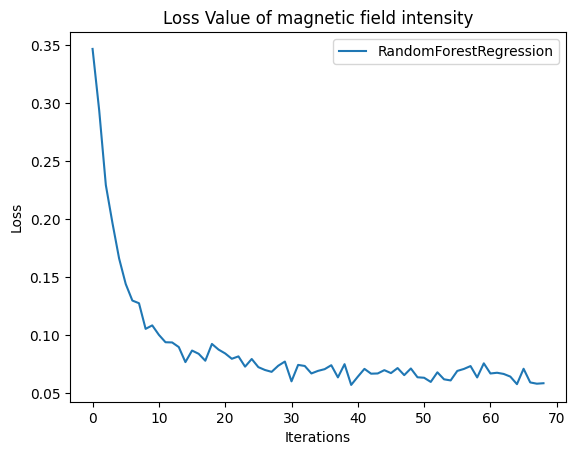

In [6]:
# Plot model losses
plt.plot(losses, label='RandomForestRegression')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Value of magnetic field intensity")
plt.legend(loc="upper right")

plt.show()


In [8]:
# Predict on testing data using trained models, and calculate the test  mean square error of each model


pred=model.predict(X_test)
regression_mse = mean_squared_error(y_test, pred)
print("mean square error:", regression_mse)
acc=0
for i in range(len(pred)):
  if abs(pred[i]==y_test[i])<=0.1:
    acc+=1
print("accuracy:", acc/len(pred))


mean square error: 0.05875524324622013
accuracy: 1.0


In [9]:
I_losses = []
X=[[row[1], row[2], row[3], row[4], row[5], row[6], row[7]] for row in data]
y=[row[0] for row in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
n=0
for train_size in train_sizes:
  X_trainn = np.array(X_train[:train_size])
  y_trainn = np.array(y_train[:train_size])
  model.fit(X_trainn, y_trainn)
  y_pred = model.predict(X_test)
  loss = mean_squared_error(y_test, y_pred)
  I_losses.append(loss)
  print(f'{n}',loss)
  n+=1

  # 40s loss below 0.1

0 0.17338032827203195
1 0.13839784361072524
2 0.11661220195405256
3 0.10379487504432656
4 0.09839375958374391
5 0.09633610422231068
6 0.08649196540777439
7 0.07958230682494132
8 0.07467445419917651
9 0.07496250588094108
10 0.08509285008650844
11 0.06523989942421782
12 0.06721182013453252
13 0.07050286546758519
14 0.06469991646237586
15 0.059308726219041714
16 0.06719357957412103
17 0.062652908071017
18 0.060309571688383266
19 0.06322464633975748
20 0.0627206010105032
21 0.06153251228370543
22 0.061890739145564956
23 0.05698388520899405
24 0.056331248492889105
25 0.06096369729886312
26 0.05767859590586524
27 0.05903857426924571
28 0.052601579478917346
29 0.05427379932656329
30 0.06103237885972977
31 0.07076990346708105
32 0.04710836261772341
33 0.054853970322390797
34 0.05602610847550209
35 0.05505160489977647
36 0.0597343764833861
37 0.053655407903607254
38 0.051582453184045904
39 0.050892556028151764
40 0.06352706321673532
41 0.05669243245584945
42 0.051545706159946775
43 0.0576481560

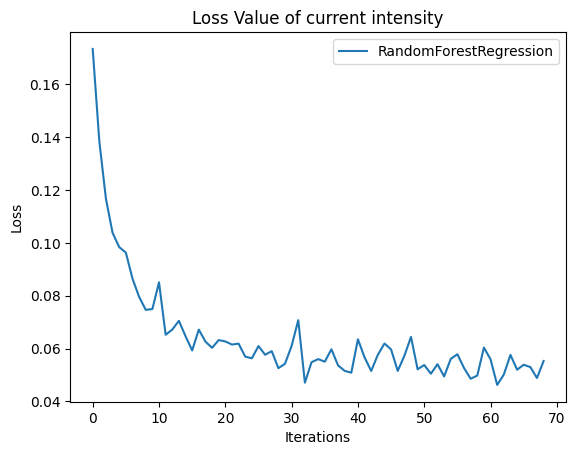

In [10]:
# Plot model losses

plt.plot(I_losses, label='RandomForestRegression')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Value of current intensity")
plt.legend(loc="upper right")

plt.show()

In [11]:
# Predict on testing data using trained models, and calculate the test mean square error of each model

pred=model.predict(X_test)
regression_mse = mean_squared_error(y_test, pred)
print("mean square error:", regression_mse)
acc=0
for i in range(len(pred)):
  if abs(pred[i]-y_test[i])<=0.1:
    acc+=1
print("accuracy:", acc/len(pred))



mean square error: 0.055303987169868986
accuracy: 0.551698670605613
